In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr 
import glob

In [2]:
ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/era5_data/era5daily_djf_uvt.nc', 
                       parallel=True, chunks={'time': 31})

rename = {'latitude': 'lat', 'longitude': 'lon'}
ds = ds.rename(rename)

ds.u

<xarray.DataArray 'u' (time: 4030, level: 37, lat: 181, lon: 360)>
dask.array<open_dataset-u, shape=(4030, 37, 181, 360), dtype=float32, chunksize=(31, 37, 181, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T09:00:00 ... 2023-02-28T09:00:00
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * level    (level) float64 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1e+03
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1
    cell_methods:   time: mean

In [3]:
# ubar = ds.u.mean(('lon', 'time')).load()
# ubar

In [4]:
# ubar.plot.contourf(levels=20, yincrease=False, yscale='log', figsize=(9,5))

In [5]:
# def zonal_mean_zonal_wind(ds, yscale='log', levels=15, yincrease=False, figsize=(8,5)):
    
#     """
#     Input: Xarray dataset containing u=u(lon,lat,level,time)
    
#     Output: Countour plot showing zonal-mean zonal wind
#     """
    
#     # calculate zonal-mean zonal wind
#     ubar = ds.u.mean(('time', 'lon'))
    
#     # import custom colour map
#     import seaborn as sns
#     coolwarm = sns.color_palette("coolwarm", as_cmap=True)
    
#     # plot it
#     plt.figure(figsize=figsize)
    
#     plt.contourf(ds.lat.values, ds.level.values, ubar,
#                  cmap=coolwarm, levels=levels)
#     plt.colorbar(location='bottom', orientation='horizontal', shrink=0.5,
#              label='Wind speed (m/s)')
    
#     plt.yscale(yscale)
    
#     if yincrease == False:
#         plt.gca().invert_yaxis()
    
#     plt.xlabel('Latitude ($^\\circ$N)')
#     plt.ylabel('Log pressure (hPa)')
#     plt.title('DJF Zonal-mean zonal wind')
#     plt.show()

In [6]:
# zonal_mean_zonal_wind(ds)

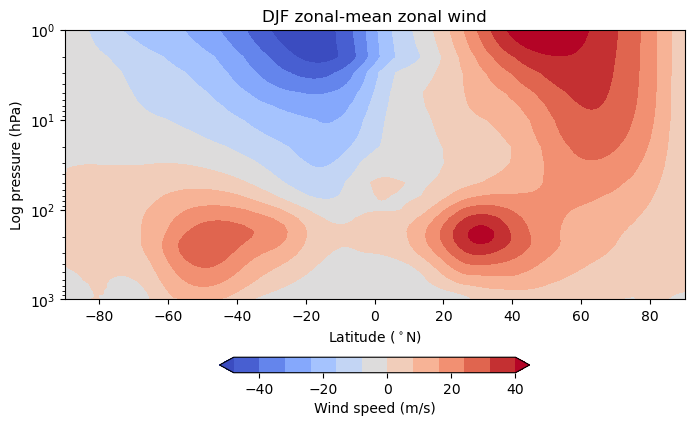

In [7]:
import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef

ef.zonal_mean_zonal_wind(ds)